# Домашнее задание 2. Классификация изображений.

-----
-----

Summary этого ноутбука: для первого и второго заданий accuracy 0.395 и 0.77 соответсвенно. Получается, оценка может составить 8.98 * 0.5 + 7.94 * 0.5 = 8.46. Просто функция подсчёта accuracy у меня почему-то срабатывала через раз. Как бы то ни было, я сохранил все итоговые модели и State Dicts (SDI) для них на Google Диске:

https://drive.google.com/drive/folders/1V5maviyn0-oPtymtQ3eHVA7N0U1NZZIj?usp=sharing

Все модели на wandb (там много лишних, но они скрыты, а нужные подписаны):

https://wandb.ai/maxim-kataev-2002/lightning_logs?workspace=user-maxim-kataev-2002

Ещё хотел отметить, что второе задание я выполнял в Colab’е, а первое — у себя локально. Поэтому в первом задании везде device(«mps») — компьютер на ARM. Возможно, это придётся заменить на device(«gpu»).

Скриншоты с моделями на всякий случай приложу в конце, вместе с отчётом

-----
-----

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

In [ ]:
!pip install wandb
!pip3 install pytorch_lightning torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.9/243.9 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.3/776.3 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 17.0 MB/s eta 0:00:00


**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [ ]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


True

In [ ]:
import math
import os
import random
import sys

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm
from collections import defaultdict, namedtuple
from pytorch_lightning import LightningModule

# You may add any imports you need

In [ ]:
# from google.colab import drive
# drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(42)

In [ ]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2023-11-12 12:41:22--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2023-11-12 12:41:22--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc09eab501f340639322e2e7431d.dl.dropboxusercontent.com/cd/0/get/CHaCn-6k9kXOflUHpn-AcKeVPC6JH_2RK63bIX4Jhlc5sIxaBcY0Azb9NKtanHlTNSKExSa3cm_VQSdPZL7Vq-oVqKJcOTILRe763wA28cUMmhsTT_K9tPdNG8SK83dC7znHZOQsI5gfpmKD-qkNtKTz/file?dl=1# [following]
--2023-11-12 12:41:23--  https://uc09eab501f340639322e2e7431d.dl.dropboxusercontent.com/cd/0/get/CHaCn-6k9kXOflUHpn-AcKeVPC6JH_2RK63bIX4Jhlc5sIxaBcY0Azb9NKtanHlTNSKExSa3cm_VQSdPZL7Vq-oVqKJcOTILRe763w

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

-----
-----

Сразу проведём нормализацию данных, для этого найдём среднее и стандартное отклонение с помощью пользовательской функции. Аналогичная функция была использована на этом ресурсе: [ресурс о нормализации данных](https://www.binarystudy.com/2022/04/how-to-normalize-image-dataset-inpytorch.html#heading4).

-----
-----

In [ ]:
# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)
val_transform = transform=transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
    ]
)

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


In [ ]:
def batch_mean_and_sd(loader):

    cnt = 0
    fst_moment = torch.empty(3)
    snd_moment = torch.empty(3)

    for images, _ in loader:
        b, c, h, w = images.shape
        nb_pixels = b * h * w
        sum_ = torch.sum(images, dim=[0, 2, 3])
        sum_of_square = torch.sum(images ** 2,
                                  dim=[0, 2, 3])
        fst_moment = (cnt * fst_moment + sum_) / (
                      cnt + nb_pixels)
        snd_moment = (cnt * snd_moment + sum_of_square) / (
                            cnt + nb_pixels)
        cnt += nb_pixels

    mean, std = fst_moment, torch.sqrt(
      snd_moment - fst_moment ** 2)
    return mean,std

In [ ]:
mean, std = batch_mean_and_sd(train_dataloader)
print("mean and std: \n", mean, std)
# mean and std:
#  tensor([0.4802, 0.4481, 0.3975]) tensor([0.2764, 0.2689, 0.2816])

mean and std: 
 tensor([0.4802, 0.4481, 0.3975]) tensor([0.2764, 0.2689, 0.2816])


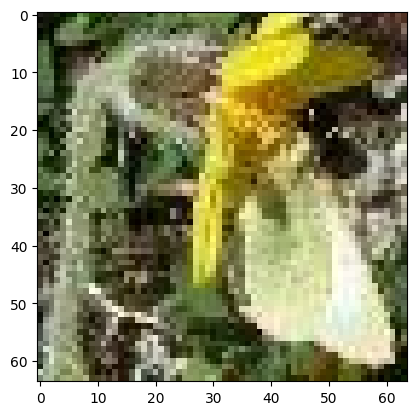

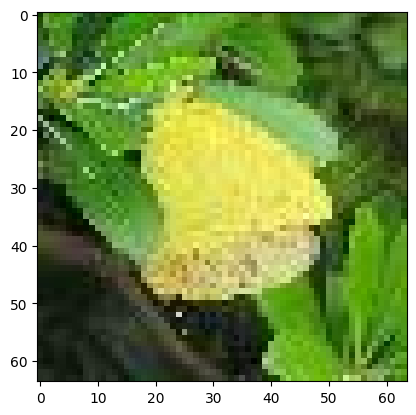

In [ ]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

-----
-----

Теперь сделаем похожую загрузку данных, но добавим аугментации и вставим в Normalize() найденные значения среднего и стандартного отклонения.

-----
-----

In [ ]:
# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = transforms.Compose(
    [
        transforms.ColorJitter(hue=0.05, saturation=0.05),
        transforms.RandomHorizontalFlip(),
        transforms.RandomRotation(20),
        transforms.RandomAdjustSharpness(sharpness_factor=2),
        transforms.RandomGrayscale(),
        transforms.RandomSolarize(threshold=192.0),
        transforms.RandomAffine(10),
        transforms.RandomPosterize(bits=2),
        transforms.RandomEqualize(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4802, 0.4481, 0.3975), (0.2764, 0.2689, 0.2816)),
    ]
)
val_transform = transform=transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        transforms.Normalize((0.4802, 0.4481, 0.3975), (0.2764, 0.2689, 0.2816)),
    ]
)

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = DataLoader(train_dataset, batch_size=256, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=256, shuffle=False, num_workers=4)

In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

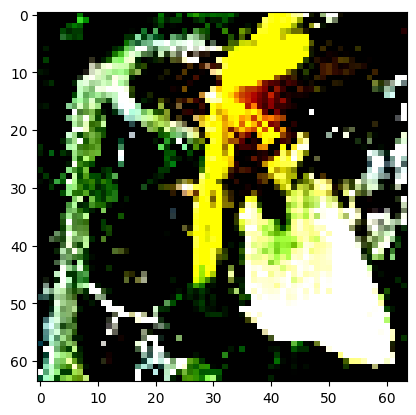

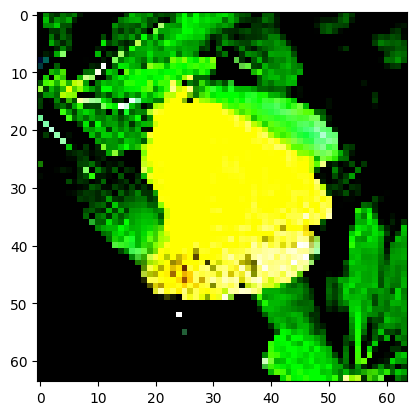

In [ ]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

### Модель, модуль и валидация результатов

-----
-----

Обученная модель и веса для неё есть на Google Диске (task1)

-----
-----

In [ ]:
from torchvision.models import resnet50

In [ ]:
class YourModule(pl.LightningModule):
    def __init__(self, pretrained: bool = False):
        super().__init__()
        self.pretrained = pretrained


        if pretrained:
            self.model = resnet50(pretrained=True)
            self.model.fc = nn.Identity()
            self.classifier = nn.Linear(1000, 200)
            self.optimizer = torch.optim.Adam(self.classifier.parameters())
        else:
            self.model = resnet50(pretrained=False)
            self.model.fc = nn.Linear(self.model.fc.in_features, 200)
            self.optimizer = torch.optim.Adam(self.model.parameters())

        self.loss = nn.CrossEntropyLoss()
        pass

    def forward(self, x):
        if self.pretrained:
            with torch.no_grad():
                features = self.model(x)
            preds = self.classifier(features)
        else:
            preds = self.model(x)
        return preds
        pass

    def configure_optimizers(self):
        return self.optimizer
        pass

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss
        pass

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long(), task = 'multiclass', num_classes=200)
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)
        pass

In [ ]:
wandb_logger = WandbLogger(log_model='all')
# device = torch.device("mps")
# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model = resnet50(pretrained=False)
module = YourModule(pretrained=False)

In [ ]:
# model = (torch.load("./drive/My Drive/task1_model5.pth")).to(device)

In [ ]:
seed_everything(42)

trainer = pl.Trainer(accelerator="gpu", max_epochs=30, logger=wandb_logger)
trainer.fit(module, train_dataloader, val_dataloader)

In [ ]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    accuracy = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            loss = model(images, labels)
            acc_batch = model.get_accuracy(reset=True)
        accuracy += acc_batch
    accuracy = accuracy / len(test_dataloader)
    return accuracy

In [ ]:
# model = ("task1_model5.pth")

accuracy = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * accuracy / 0.44, 0, 10):.2f} баллов")

In [ ]:
# PATH = "./drive/My Drive/task1_model5.pth"
# torch.save(model, PATH)

In [ ]:
# PATH = "./drive/My Drive/SDI_task1_model5.pth"
# torch.save(model.state_dict(), PATH)

-----
-----

На всякий случай оставлю ниже собственную архитектуру и модуль для неё, хотя их нет на Google Диске. Модель в целом неплохая, но accuracy у неё 0.36

-----
-----

In [ ]:
class YourNet(torch.nn.Module):
    def __init__(self, dropout=0.4):
        super().__init__()

        self.batch_norm1 = torch.nn.BatchNorm2d(3)

        self.relu = torch.nn.LeakyReLU()

        self.maxpool = torch.nn.MaxPool2d(kernel_size=2)

        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3),
            self.relu,
            self.maxpool,
        )
        self.batch_norm2 = torch.nn.BatchNorm2d(64)

        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3),
            self.relu,
            self.maxpool,
        )
        self.batch_norm3 = torch.nn.BatchNorm2d(128)

        self.conv3 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3),
            self.relu,
            self.maxpool,
        )
        self.batch_norm4 = torch.nn.BatchNorm2d(256)

        self.conv4 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3),
            self.relu,
            self.maxpool,
        )

        self.linear1 = torch.nn.Linear(in_features=2048, out_features=128)
        self.linear2 = torch.nn.Linear(in_features=128, out_features=256)
        self.linear3 = torch.nn.Linear(in_features=256, out_features=512)

        self.output = torch.nn.Linear(in_features=512, out_features=200)

        self.dropout = torch.nn.Dropout(p=dropout)


        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()

        pass

    def _forward(self, x):
        x = self.batch_norm1(x)
        x = self.conv1(x)

        x = self.batch_norm2(x)
        x = self.conv2(x)

        x = self.batch_norm3(x)
        x = self.conv3(x)

        x = self.batch_norm4(x)
        x = self.conv4(x)

        x = x.view(x.size(0), -1)
        x = self.relu(self.linear1(x))
        x = self.dropout(x)
        x = self.relu(self.linear2(x))
        x = self.dropout(x)
        x = self.relu(self.linear3(x))

        return self.output(x)

        pass

    def forward(self, images, target=None):

        # images ~ (batch size, num channels, height, width)
        # target ~ (batch size)
        # output ~ (batch size, num classes)
        output = self._forward(images)

        # get accuracy score and save it to self.accuracy
        if target is not None:
            loss = self.loss_func(output, target)

            self.targets = torch.cat((self.targets, target.cpu()), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)
            self.accuracy = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=200)

        return loss if target is not None else output

        pass

    def get_accuracy(self, reset=False):

        # return accuracy by all values till now
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accuracy

        pass

### Тренировочный класс lightning

In [ ]:
class YourModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()

        self.model = model
        self.learning_rate = learning_rate

        pass

    def forward(self, x):

        result = self.model(x)
        return result

        pass

    def configure_optimizers(self):

        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)
        return optimizer

        pass

    def training_step(self, train_batch, batch_idx):

        images, target = train_batch
        result = self.forward(images)
        loss = self.model(images, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

        pass

    def validation_step(self, val_batch, batch_idx):

        images, target = val_batch
        result = self.forward(images)
        loss = self.model(images, target)
        acc = accuracy(torch.argmax(result, dim=-1).long(), target.long(), task = 'multiclass', num_classes=200)
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)

        pass

In [ ]:
wandb_logger = WandbLogger(log_model='all')
# device = torch.device("mps")
# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model = YourNet().to(device)
module = YourModule(model, learning_rate=0.001)

In [ ]:
seed_everything(42)

trainer = pl.Trainer(accelerator="gpu", max_epochs=30, logger=wandb_logger)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type    | Params
----------------------------------
0 | model | YourNet | 2.1 M 
----------------------------------
2.1 M     Trainable params
0         Non-trainable params
2.1 M     Total params
8.325     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

OutOfMemoryError: ignored

### Валидация результатов задания

In [ ]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    accuracy = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            loss = model(images, labels)
            acc_batch = model.get_accuracy(reset=True)
        accuracy += acc_batch
    accuracy = accuracy / len(test_dataloader)
    return accuracy

In [ ]:
# model = YourNet().to(device) или resnet50 model (= "task1_model5.pth")

accuracy = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * accuracy / 0.44, 0, 10):.2f} баллов")


100%|██████████| 79/79 [00:07<00:00, 10.51it/s]

Оценка за это задание составит 5.60 баллов


## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

In [ ]:
# YOU CAN DEFINE AUGMENTATIONS HERE
train_transform = transforms.Compose(
    [
        transforms.Resize(256),
        transforms.ColorJitter(hue=0.05, saturation=0.05),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(224),
        transforms.RandomRotation(20),
        transforms.RandomAdjustSharpness(sharpness_factor=2),
        transforms.RandomGrayscale(),
        transforms.RandomSolarize(threshold=192.0),
        transforms.RandomAffine(10),
        transforms.RandomPosterize(bits=2),
        transforms.RandomEqualize(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize((0.4802, 0.4481, 0.3975), (0.2764, 0.2689, 0.2816)),
    ]
)
val_transform = transform=transforms.Compose(
    [
        transforms.Resize(256),
        torchvision.transforms.ToTensor(),
        transforms.Normalize((0.4802, 0.4481, 0.3975), (0.2764, 0.2689, 0.2816)),
    ]
)

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)
# REPLACE ./dataset/dataset WITH THE FOLDER WHERE YOU DOWNLOADED AND UNZIPPED THE DATASET

train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)
val_dataloader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=4)

In [ ]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


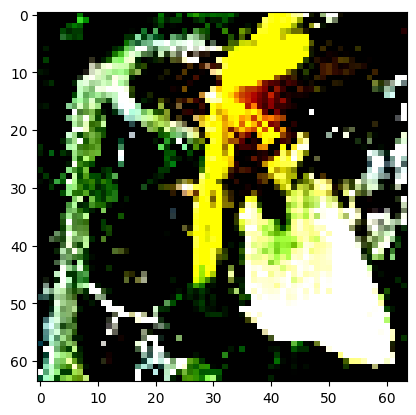

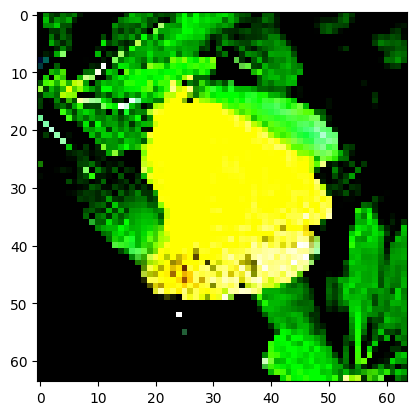

In [ ]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

### Модель (или просто импортируйте предобученную)

-----
-----

Обученная модель и веса для неё есть на Google Диске (task2)

-----
-----

In [ ]:
from torchvision.models import swin_v2_b
#resnext101_32x8d немного хуже

### Тренировочный класс lightning

In [ ]:
class YourModule(pl.LightningModule):
    def __init__(self, pretrained: bool = False):
        super().__init__()
        self.pretrained = pretrained


        if pretrained:
            self.model = swin_v2_b(pretrained=True)
            self.model.fc = nn.Identity()
            self.classifier = nn.Linear(1000, 200)
            self.optimizer = torch.optim.Adam(self.classifier.parameters())
        else:
            self.model = swin_v2_b(pretrained=False)
            self.model.fc = nn.Linear(self.model.fc.in_features, 200)
            self.optimizer = torch.optim.Adam(self.model.parameters())

        self.loss = nn.CrossEntropyLoss()
        pass

    def forward(self, x):
        if self.pretrained:
            with torch.no_grad():
                features = self.model(x)
            preds = self.classifier(features)
        else:
            preds = self.model(x)
        return preds
        pass

    def configure_optimizers(self):
        return self.optimizer
        pass

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss
        pass

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        preds = self.forward(images)
        loss = self.loss(preds, target)
        acc = accuracy(torch.argmax(preds, dim=-1).long(), target.long(), task = 'multiclass', num_classes=200)
        self.log("val_loss", loss, prog_bar=True)
        self.log("accuracy", acc, prog_bar=True)
        pass

In [ ]:
wandb_logger = WandbLogger(log_model='all')
# device = torch.device("mps")
# device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

model = swin_v2_b(pretrained=True)
module = YourModule(pretrained=True)

In [ ]:
# model = (torch.load("./drive/My Drive/task2_model0.pth")).to(device)

In [ ]:
seed_everything(42)

trainer = pl.Trainer(accelerator="gpu", max_epochs=30, logger=wandb_logger)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type             | Params
-------------------------------------------
0 | model | ResNet           | 23.9 M
1 | loss  | CrossEntropyLoss | 0     
-------------------------------------------
23.9 M    Trainable params
0         Non-trainable params
23.9 M    Total params
95.671    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

OutOfMemoryError: ignored

In [ ]:
# PATH = "./drive/My Drive/task2_model0.pth"
# torch.save(model, PATH)

In [ ]:
# PATH = "./drive/My Drive/SDI_task2_model0.pth"
# torch.save(model.state_dict(), PATH)

### Валидация результатов задания

In [ ]:
# model = YourNet().to(device) или (= "task2_model0.pth")

accuracy = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy - 0.5) / 0.34, 0, 10):.2f} баллов")


  0%|          | 0/79 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
  0%|          | 0/79 [00:02<?, ?it/s]


TypeError: ignored

# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

-----
-----

В общем, для первого задания было так:
1. Модель из семинара, lr=0.001, 20 эпох  — уже хорошо, но accuracy не больше 0.3
2. Собственная модель (добавил немного слоёв в модель из семинара), lr=0.001, 50 эпох  — чуть лучше, accuracy 0.32 — 0.33
3. Собственная модель и значительно больше аугментаций, lr=0.001, 30 эпох  — ещё лучше, accuracy 0.36
4. Not pretrained resnet50 и много аугментаций, 30 эпох — удалось выбить accuracy 0.395 (только последние эпохи почему-то не отразились на графике в wandb, хотя всё зафиксировалось в сохранённой модели)

Размер батча везде был 128.

Для второго задания было так:
1. resnet50 и размер батча 2048, 20 эпох — accuracy меньше 0.5
2. resnext101_32x8d и размер батча 256, 5 эпох — accuracy 0.66
3. swin_v2_b и размер батча 128, 5 эпох — удалось выбить  accuracy 0.77

Во втором задании уже везде было много аугментаций.

Ещё раз ссылка на wandb и, если вдруг не загрузится, скриншоты оттуда и с Colab'а: https://wandb.ai/maxim-kataev-2002/lightning_logs?workspace=user-maxim-kataev-2002  

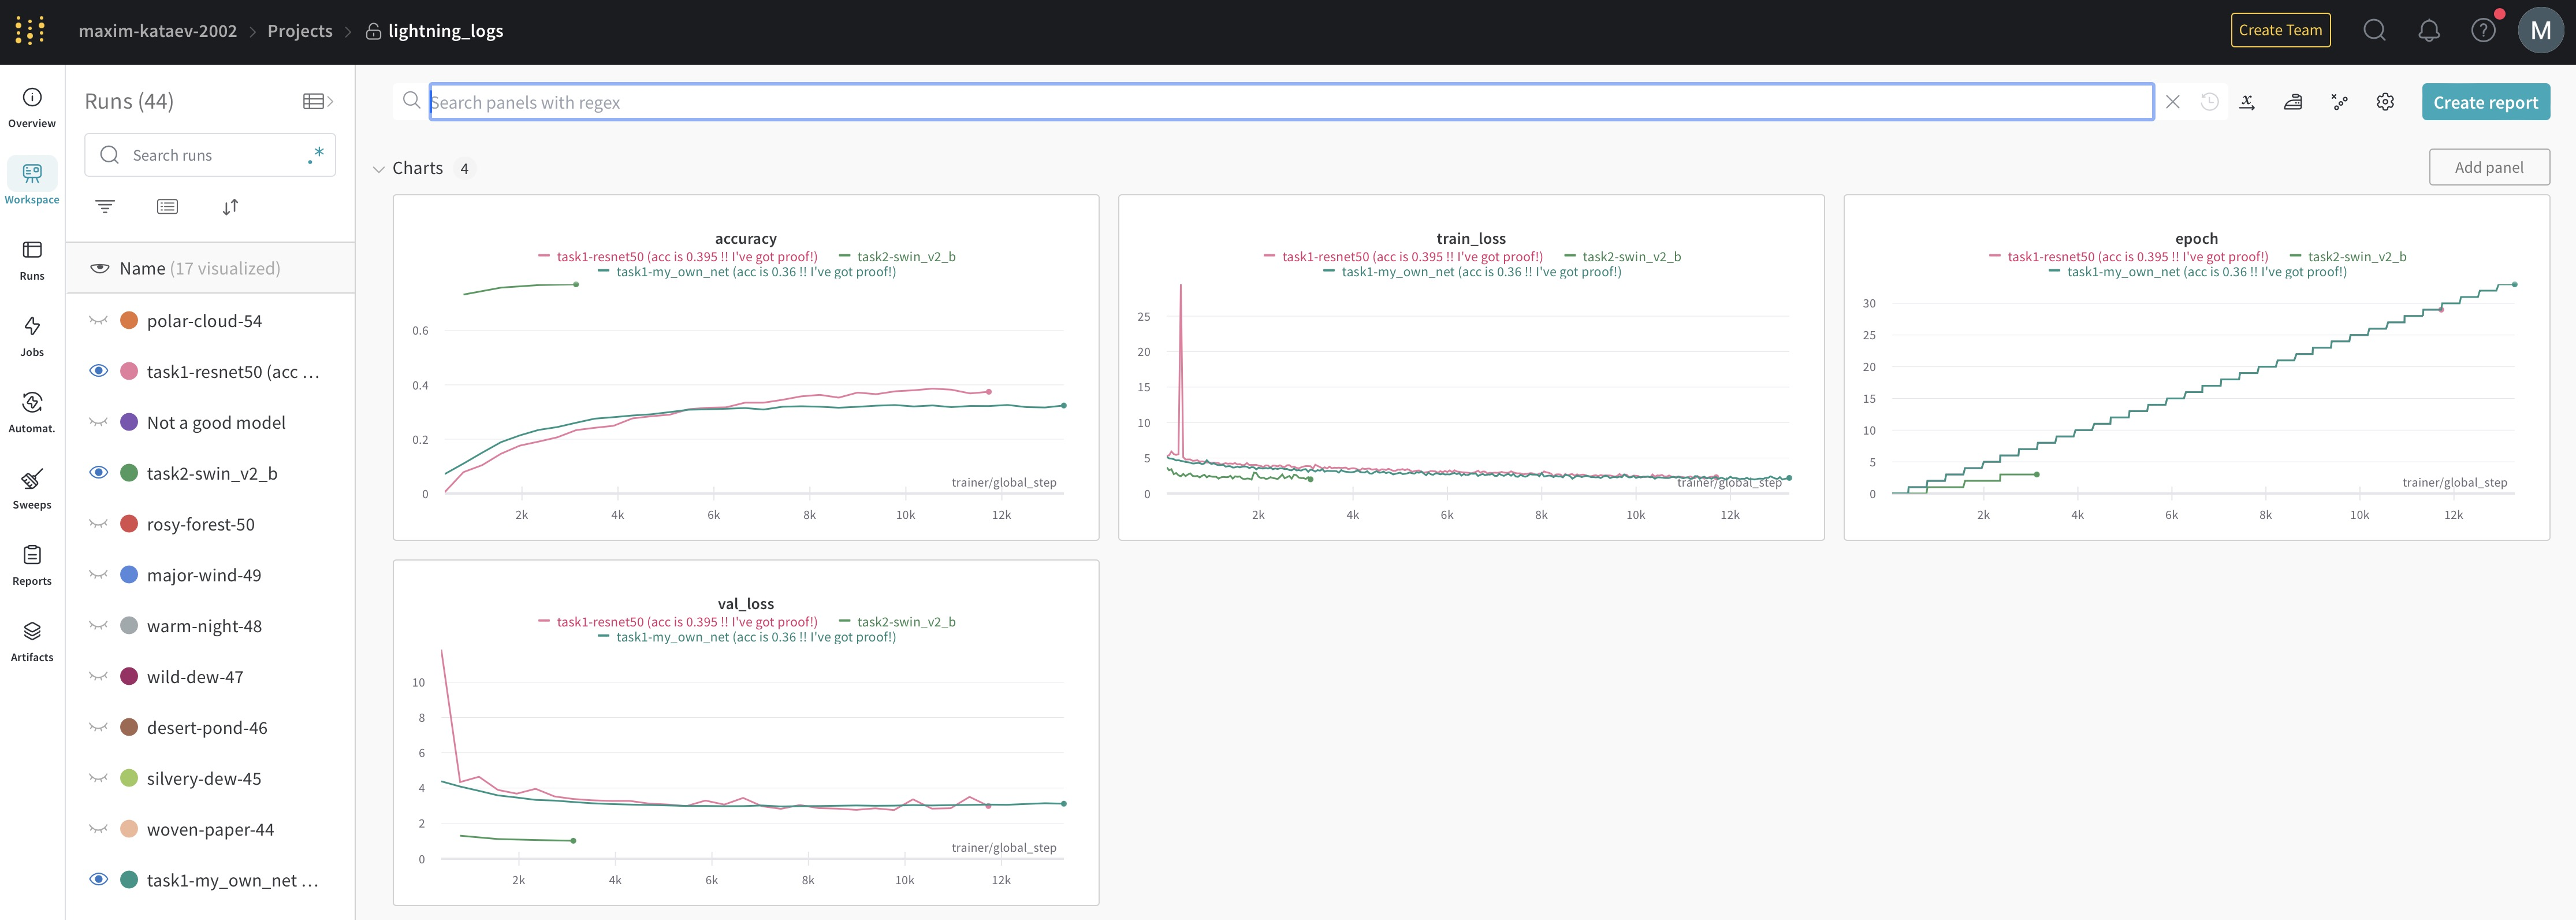

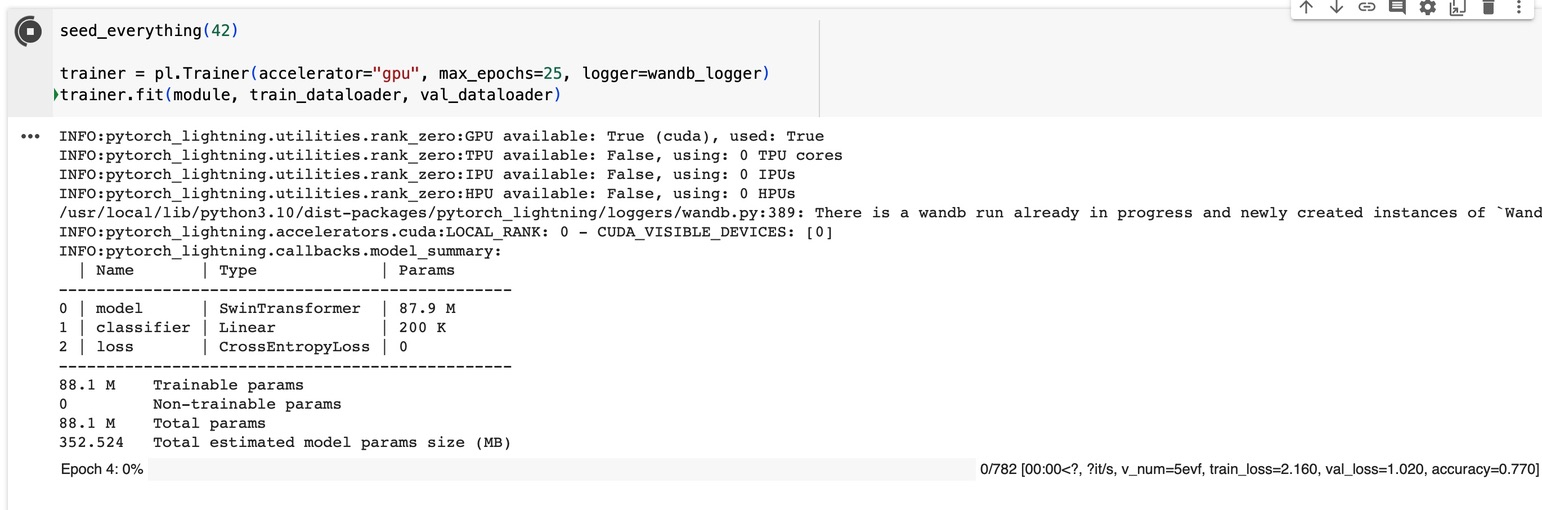

Для первого задания я не сообразил сделать такой же скриншот, но там точно accuracy 0.395 )

-----
-----